In [1]:
import sys
sys.path.append('../../utils')
import utils

import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import numpy as np

from typing import List

## Plotly

In [2]:
df = sns.load_dataset("diamonds")
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

<h1>Simple treemap</h1>

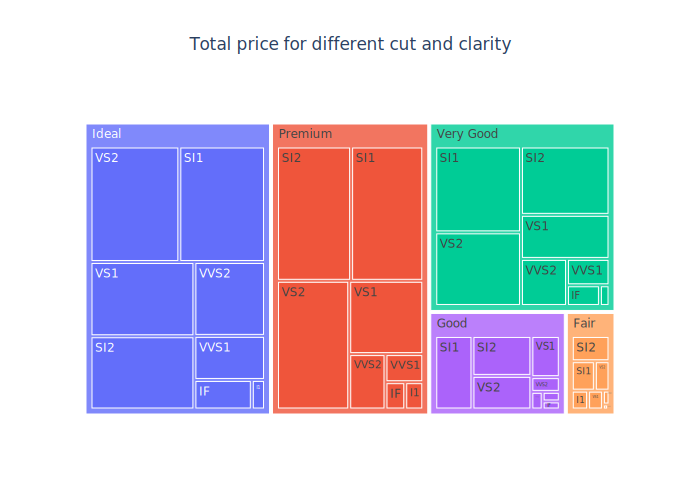

In [3]:
fig = px.treemap(df, path=["cut", "clarity"], values='price', title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5)
utils.save_px(fig,1)
fig.show("svg")

<h1>Treemap with discrete colors</h1>

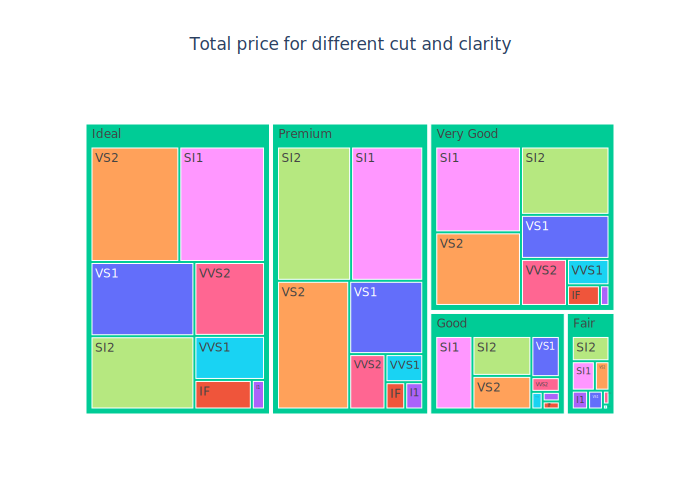

In [4]:
fig = px.treemap(df, path=["cut", "clarity"], values='price', \
    color='clarity',
    title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5)
utils.save_px(fig,2)
fig.show("svg")

<h1>Treemap with user-defined discrete colors</h1>

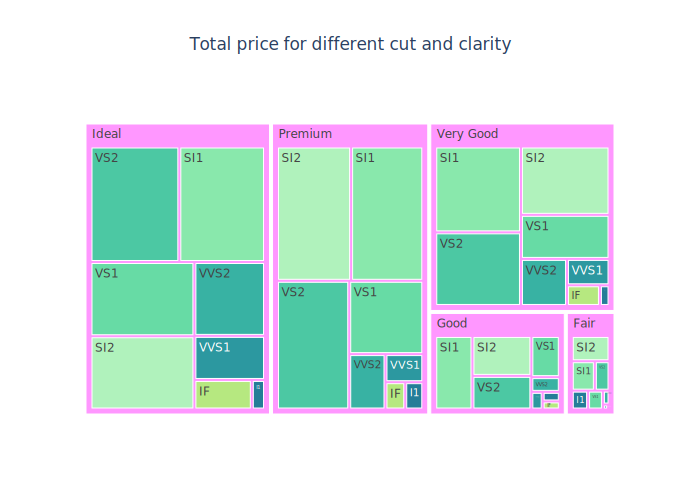

In [5]:
clarity = df["clarity"].unique()
color_map = dict(zip(clarity, px.colors.sequential.Tealgrn))

fig = px.treemap(df, path=["cut", "clarity"], values='price', \
    color='clarity',
    color_discrete_map=color_map,
    title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5)
utils.save_px(fig,3)
fig.show("svg")

<h1>Treemap with continuous colors</h1>

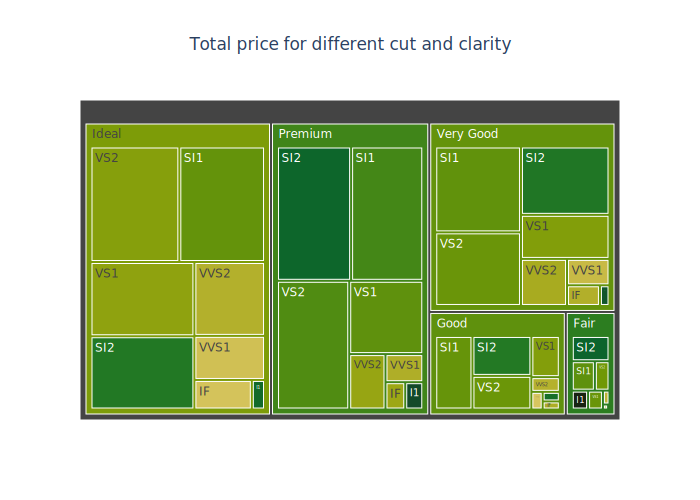

In [6]:
fig = px.treemap(df, path=["cut", "clarity"], values='price', \
    color='carat',
    color_continuous_scale="speed",
    color_continuous_midpoint=np.average(df["carat"], weights=df["price"]),
    title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5, coloraxis_showscale=False)
utils.save_px(fig,4)
fig.show("svg")

<h1>Treemap with user-defined layers for sector</h1>

In [7]:
fig = px.treemap(df, path=["cut", "clarity","carat"], values='price', \
    maxdepth=2,
    title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5, coloraxis_showscale=False)
utils.save_px(fig,5)
fig.show("svg")

<h1>Different customizations</h1>

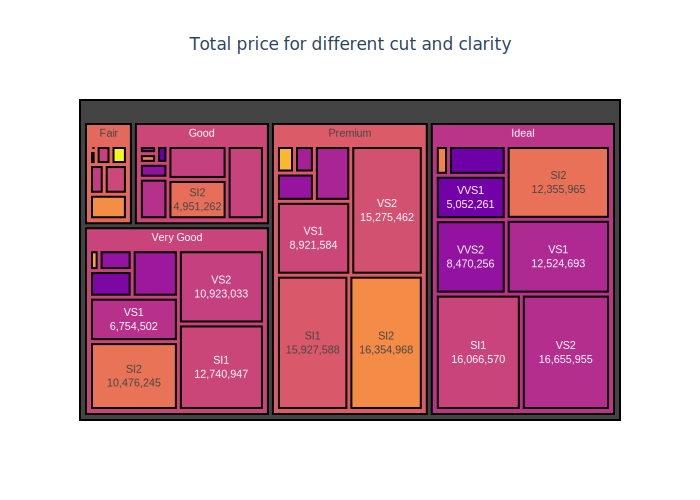

In [8]:
fig = px.treemap(df, path=["cut", "clarity"], values='price', color='carat',\
    title="Total price for different cut and clarity")
fig.update_layout(title_x=0.5, uniformtext={'minsize':10, 'mode':'hide'},coloraxis_showscale=False)
fig.update_traces(textposition='middle center', \
    marker={'line':{'width':2, 'color':'black'}}, textfont={'family':'Arial'}, textinfo="label+text+value", \
        tiling={"flip":"x+y", "pad":5})
utils.save_px(fig,6)
fig.show("svg")